In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
%matplotlib notebook

# Question 2.3.6

## Plotting solution obtained by hand

In [3]:
# Solution obtained by hand (or Maple / Mathematica / Wolfram Alpha / SymPy)
def sol_2_3_6(t):
    return 25*(5052*np.exp(-t/50) + np.sin(t) - 50*np.cos(t) + 5002)/5002

<IPython.core.display.Javascript object>


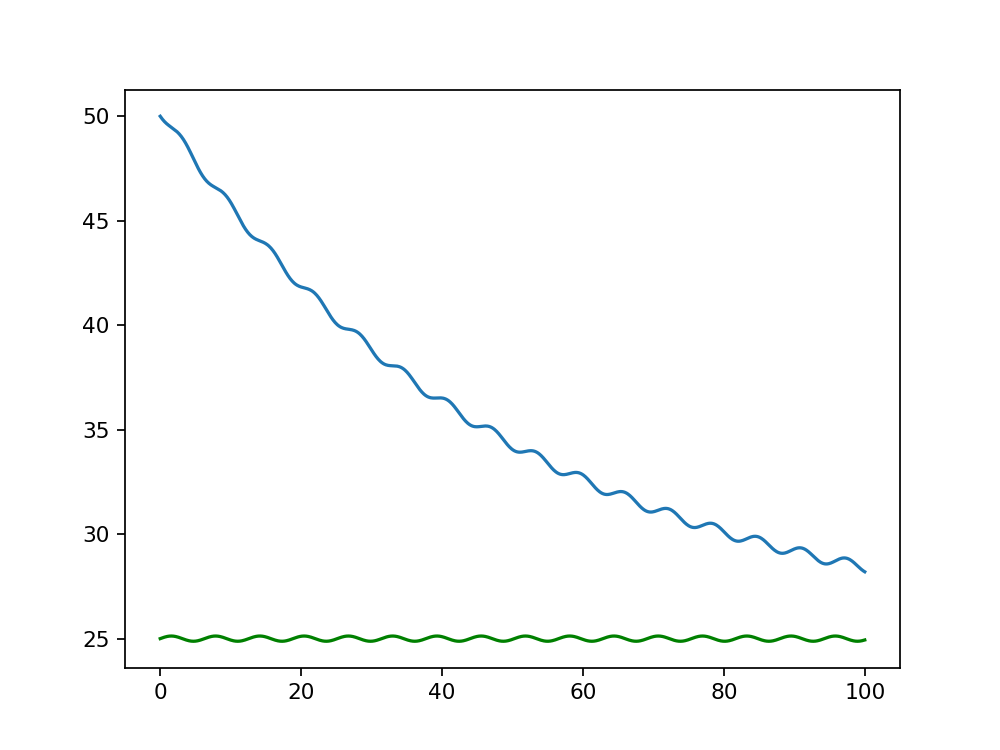

In [4]:
tt = np.linspace(0,100,1000)
plt.plot(tt,sol_2_3_6(tt))
# In green - the forcing term
plt.plot(tt,25 + 1/8*np.sin(tt), 'g')

# Question 2.3.8

## Plotting solution obtained numerically

<IPython.core.display.Javascript object>


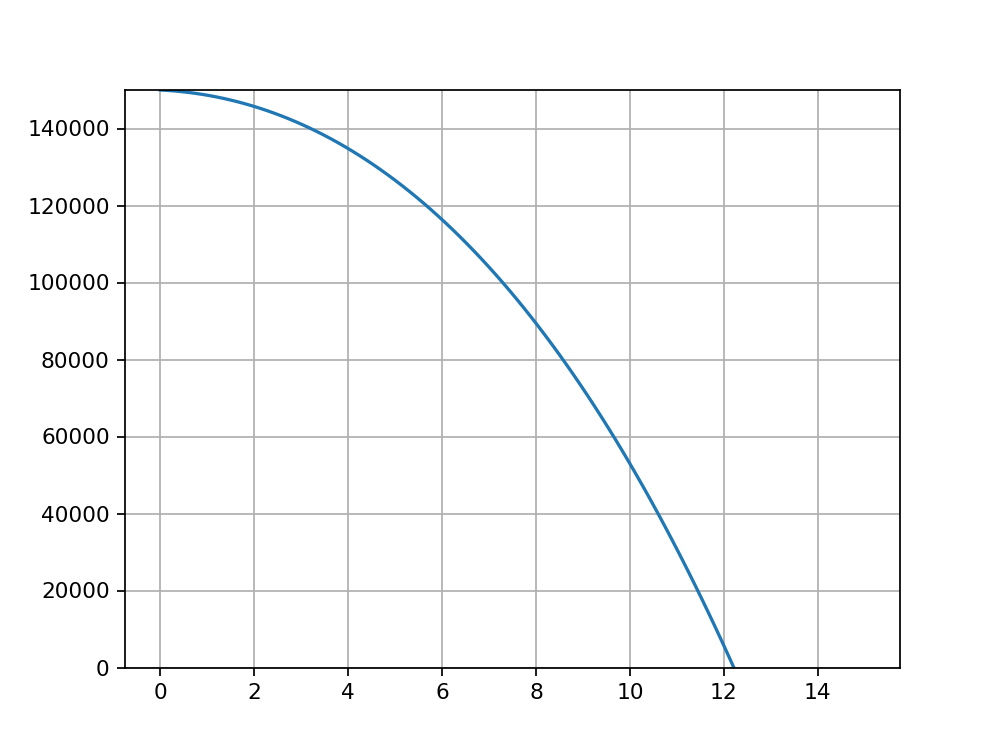

In [5]:
# Equation right-hand side
def RHS2_3_8(D, T):
    return 0.06*D - (800+10*T*12)*12

# Compute solution numerically
tt = np.linspace(0,15, 100)
sol = scipy.integrate.odeint(RHS2_3_8, 150000, tt)

# Plot the result
plt.figure()
plt.plot(tt,sol)
plt.ylim(0, 150000)
plt.grid()

# Question 2.3.23

## Plot several solutions obtained by hand

In [6]:
# Answers for x(t) and y(t)
# Assuming x(0) = 0;
def X(T, r, a, u):
    return u/r * np.cos(a) * (1-np.exp(-r*T))

# Assuming y(0) = 0; for the solution y(0)=h use h+Y(...)
def Y(T, r, a, u):
    g = 32
    return -g/r*T + (g/(r**2) + u/r * np.sin(a)) * (1-np.exp(-r*T))

<IPython.core.display.Javascript object>


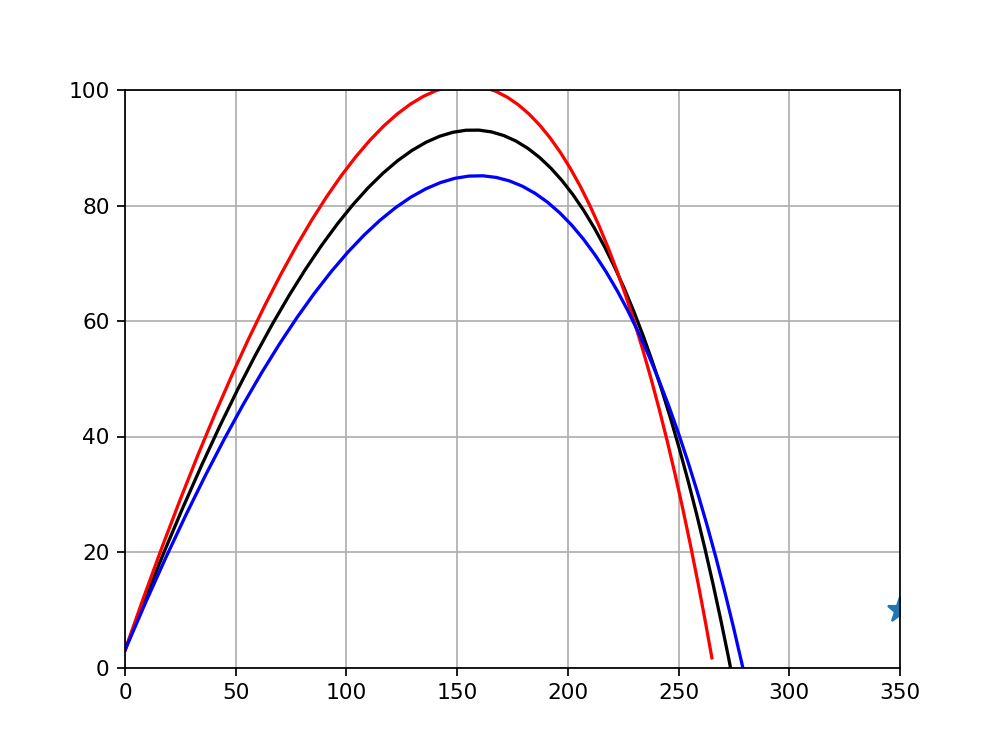

In [7]:
r = 1/5; u = 125; h = 3;

plt.figure()
plt.axis([0,350,0,100])
plt.grid()
# Star marks the target
plt.plot(350, 10, '*', markersize=12)

# Plot some trajectories (answering 2.3.23(c))
tt = np.linspace(0,5)
a = np.pi/4
plt.plot(X(tt, r, a, u), h + Y(tt, r, a, u),'k-')
a = np.pi/4 + 0.05
plt.plot(X(tt, r, a, u), h + Y(tt, r, a, u), 'r-')
a = np.pi/4 - 0.05
plt.plot(X(tt, r, a, u), h + Y(tt, r, a, u), 'b-')

## A more analytical way to find the best speed / angle

<IPython.core.display.Javascript object>


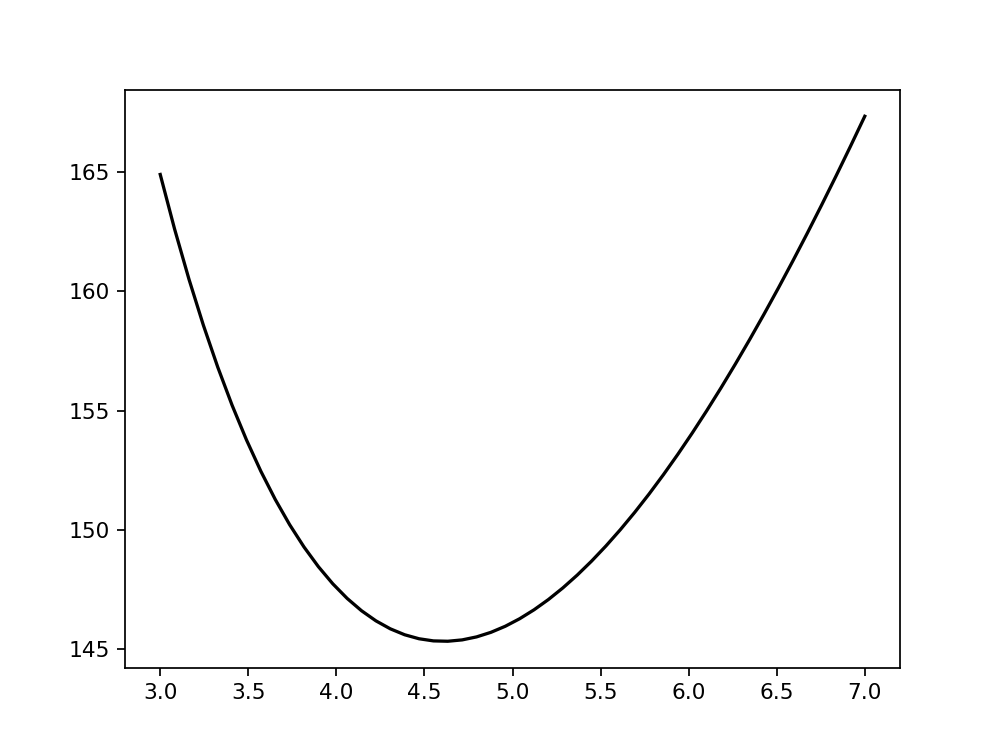

In [8]:
# The answer for u as a function of time-of-flight to the target
def F(T):
    r=1/5; g=32; h=3
    Xtarget = 350; Ytarget = 10
    return r*np.sqrt( (Xtarget/(1-np.exp(-r*T)))**2 + ( (Ytarget-h+g/r*T)/(1-np.exp(-r*T)) - g/r**2 )**2 )

tt = np.linspace(3,7)
plt.figure()
plt.plot(tt, F(tt), 'k-')

In [9]:
from scipy.optimize import minimize_scalar
minF = minimize_scalar(F, bounds=(3,7), method='bounded')

bestU = minF.fun
bestA = np.arccos(350*r / (bestU*(1-np.exp(-r*minF.x))))
print(bestU, bestA)

145.33738146413748 0.643720523792802


# Epidemics

<IPython.core.display.Javascript object>


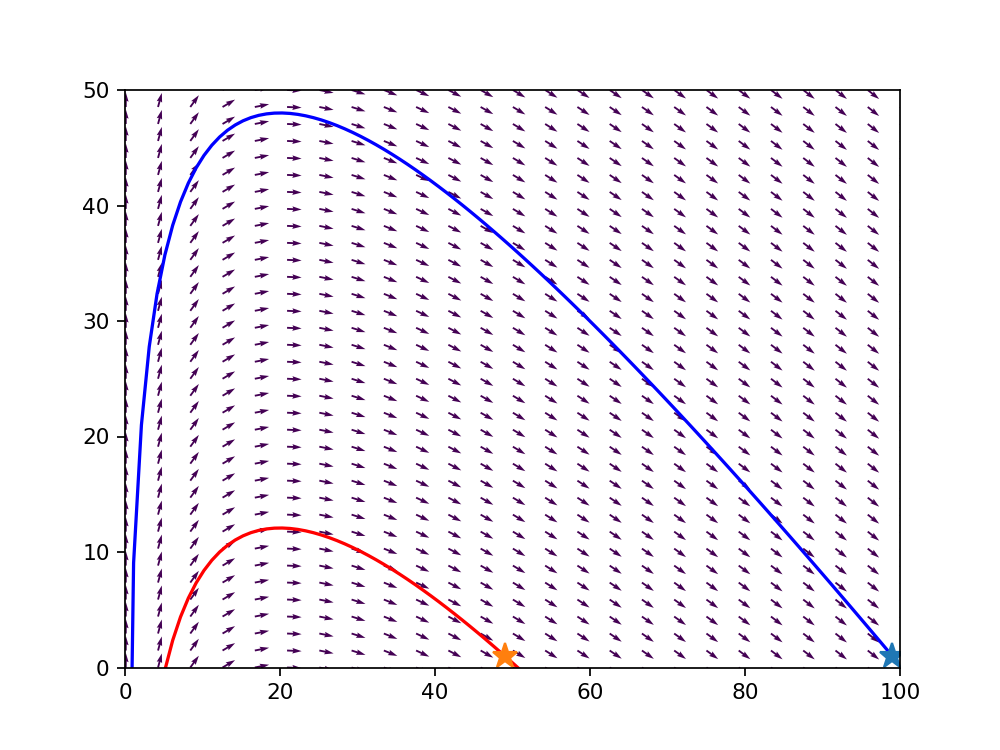

In [10]:
rho = 20

# Plot the direction field
def dIdS(I,S):
    return -1 + rho / S
S, I = np.meshgrid(np.linspace(0.1,100,num=25), np.linspace(0,50,num=35))
DS = np.ones(S.shape)
DI = dIdS(I, S)
nn = (DS**2 + DI**2)**0.5
plt.figure()
plt.quiver(S, I, DS/nn, DI/nn, 1)

#plot some particular solutions with I0, S0
ss = np.linspace(0.1,100, 100)
plt.axis([0,100, 0,50])

I0=1; S0=99
plt.plot(ss, I0+S0 - ss + rho*np.log(ss/S0), 'b-')
plt.plot(S0, I0, '*', markersize=12)

I0=1; S0=49
plt.plot(ss, I0+S0 - ss + rho*np.log(ss/S0), 'r-')
plt.plot(S0, I0, '*', markersize=12)